In [1]:
%matplotlib inline

import os
import sys
import copy
import time
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from mpl_toolkits.axes_grid1 import make_axes_locatable
from ipywidgets import interact, interactive, fixed

# autoreload user modules functionality
%load_ext autoreload
%autoreload 2

# VarClump functions
sys.path.append('../lib/')
from utils import *
from graph import *
from points_generation import *
from initial_guess import *
from variational import *
from gmr import *

# `Orion.cont.image.fits`

In [3]:
fits_path = '../data/images/Orion.cont.image.fits'
x, y, data, dfunc = load_data(fits_path)

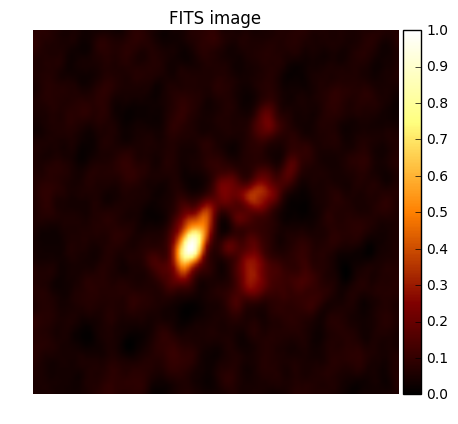

In [6]:
plt.figure(figsize=(5,5))
im = plt.imshow(data, cmap=plt.cm.afmhot)
plt.title('FITS image')
plt.axis('off')
divider = make_axes_locatable(plt.gca())
cax = divider.append_axes("right", size="5%", pad=0.05)
plt.colorbar(im, cax=cax)
plt.show()

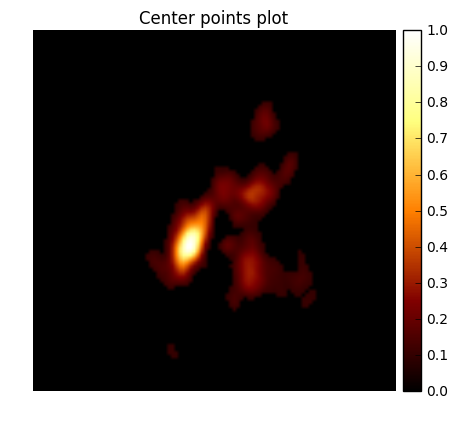

In [7]:
def level_set_plot(data, level):
    plt.figure(figsize=(5,5))
    ax = plt.gca()
    _data = np.zeros(data.shape)
    mask = data > level
    _data[mask] = data[mask]
    im = ax.imshow(_data, cmap=plt.cm.afmhot)
    plt.title('Center points plot')
    plt.axis('off')
    divider = make_axes_locatable(ax)
    cax = divider.append_axes("right", size="5%", pad=0.08)
    plt.colorbar(im, cax=cax)
    plt.show()

base_level = estimate_rms(data)
interact(level_set_plot, data=fixed(data), level=(base_level, 1.))

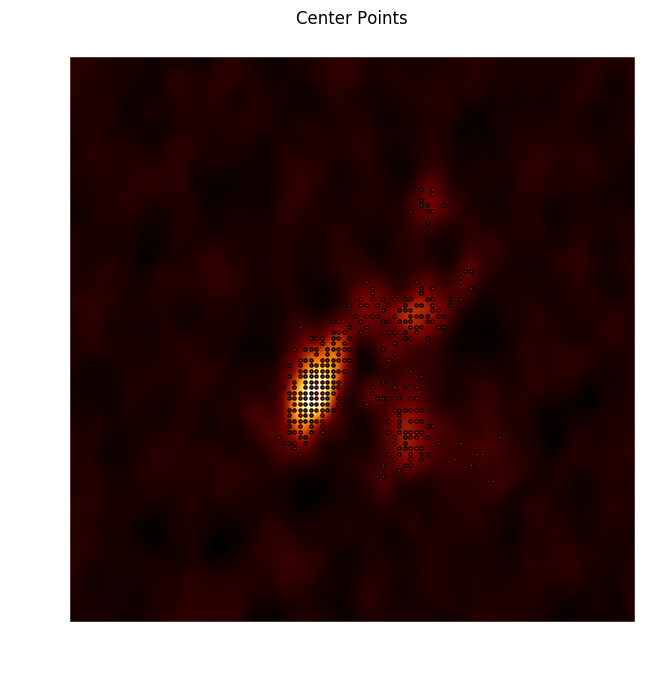

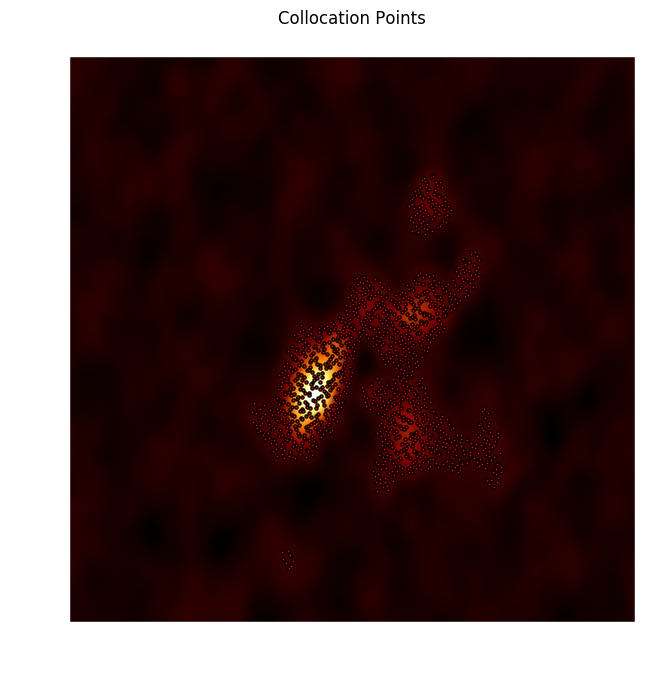

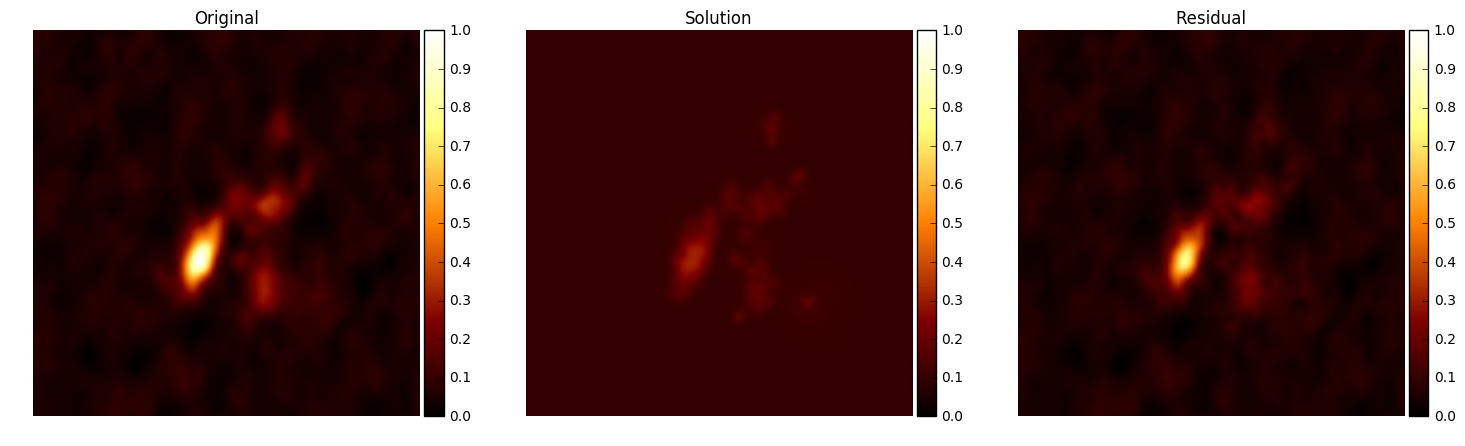

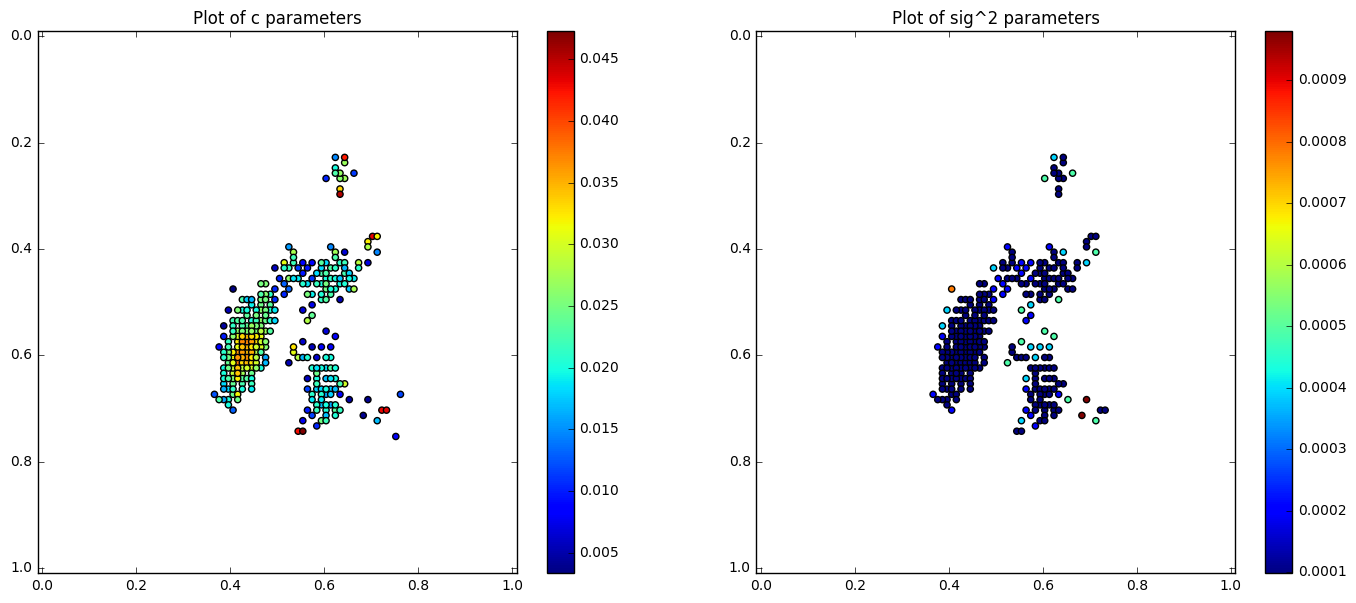

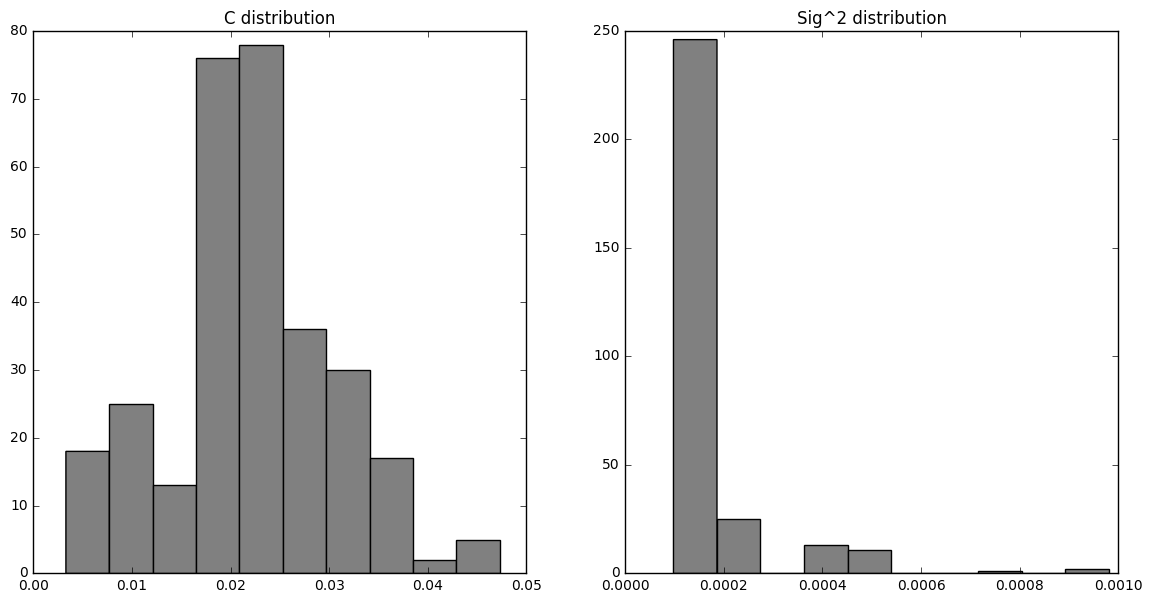

In [8]:
##########################################
# Approach 1
##########################################

# number of points of each type
Nb = 0
Nc = 300
Ne = 4*Nc-4*Nb

center_points = random_centers_generation(data, Nc, base_level=base_level, power=7.)
collocation_points = qrandom_centers_generation(dfunc, Ne, base_level, ndim=2)
boundary_points = boundary_generation(Nb)


# right format
xc = center_points[:,0]
yc = center_points[:,1]
xe = collocation_points[:,0]
ye = collocation_points[:,1]
xb = boundary_points[:,0]
yb = boundary_points[:,1]


# visualizing the choosen points
points_plot(data, center_points=center_points, title="Center Points")
points_plot(data, center_points=collocation_points, title="Collocation Points")


####################################
# Initial parameters estimation
####################################
minsig = ( 0.5*(1./data.shape[0] + 1./data.shape[1]) ) / 6.
maxsig = 30*minsig
c0, sig0 = estimate_initial_guess(center_points, dfunc, minsig=minsig, maxsig=maxsig, method='min_dist')


solution_plot(dfunc, c0, sig0, xc, yc, dims=data.shape, base_level=base_level)
params_plot(c0, sig0, xc, yc)
params_distribution_plot(c0, sig0)


elm01 = ELModel(data, dfunc, data.shape, xe, ye, xc, yc, xb, yb, c0, sig0, a=1., lamb1=1., d1psi1=d1psi, 
                d1psi2=d1psi, d2psi2=d2psi, base_level=base_level, pix_freedom=1.)

elm02 = copy.deepcopy(elm01)

In [9]:
elm_solver(elm01, method='standard', max_nfev=100000)

../lib/utils.py:147: RuntimeWarning: overflow encountered in exp
  return 1. / (1. + np.exp(-x))


KeyboardInterrupt: 

In [23]:
# gaussian agglomeration
xc, yc, c, sig = elm01.get_params_mapped()
mu = np.vstack([xc, yc]).T

components_dict01 = gaussian_reduction(c, mu, sig, n_comp=1)

Merged components 189 and 202 with 2.89641175893e-13 dissimilarity
Merged components 207 and 292 with 2.08700537791e-12 dissimilarity
Merged components 294 and 295 with 1.19701614072e-10 dissimilarity
Merged components 262 and 285 with 6.75870801163e-08 dissimilarity
Merged components 109 and 184 with 0.000263582777514 dissimilarity
Merged components 291 and 292 with 0.000392856361715 dissimilarity
Merged components 205 and 267 with 0.000443488087873 dissimilarity
Merged components 48 and 192 with 0.000686332367355 dissimilarity
Merged components 34 and 170 with 0.000954201831813 dissimilarity
Merged components 71 and 159 with 0.000954399384323 dissimilarity
Merged components 177 and 210 with 0.00103156504295 dissimilarity
Merged components 27 and 160 with 0.00111467255448 dissimilarity
Merged components 90 and 108 with 0.00115069839961 dissimilarity
Merged components 16 and 54 with 0.00115405007699 dissimilarity
Merged components 142 and 259 with 0.0011989739253 dissimilarity
Merged c

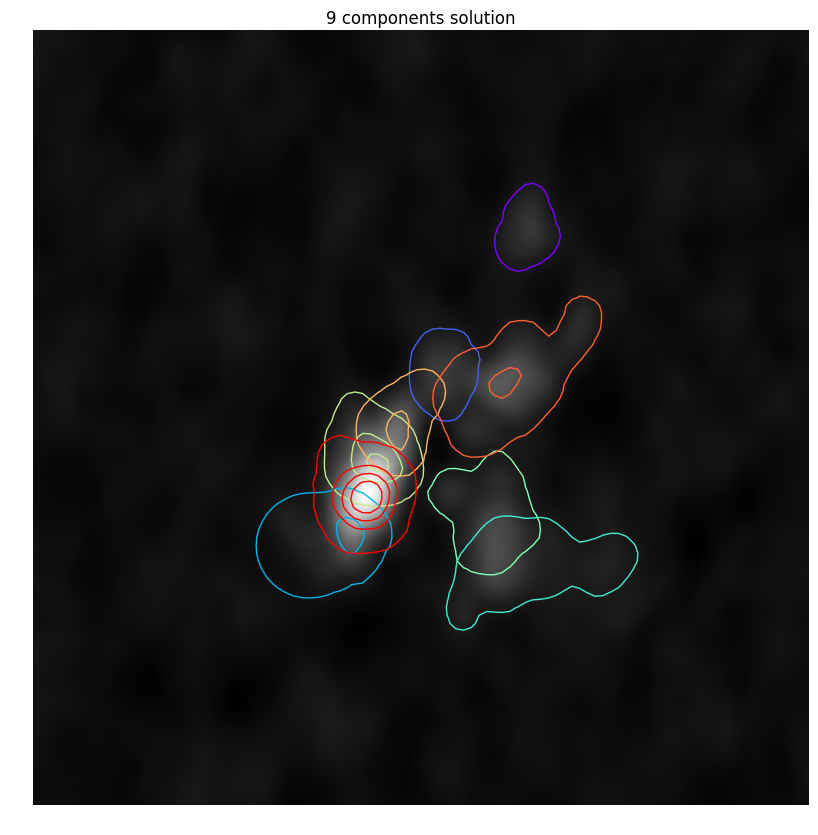

In [24]:
interact(components_plot, elm=fixed(elm01), data=fixed(data), components_dict=fixed(components_dict01), n_comp=(1,20), dims=fixed(data.shape), resolution=fixed(1), n_levels=fixed(5))

# `M100_combine_CO_cube.image.mom0.pbcor`

In [17]:
fits_path = "../data/images/M100_combine_CO_cube.image.mom0.pbcor.fits"
x, y, data, dfunc = load_data(fits_path)

In [18]:
base_level = estimate_rms(data)

In [22]:
data.shape

(800, 800)

In [23]:
mask = data.mask

In [29]:
mask[0,0]

True

In [34]:
data[0,0]+10

masked

In [19]:
base_level

0.042471331822747101

In [20]:
mask = data > base_level

/home/mavillan/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:1: RuntimeWarning: invalid value encountered in greater
  if __name__ == '__main__':


In [13]:
mask

masked_array(data =
 [[-- -- -- ..., -- -- --]
 [-- -- -- ..., -- -- --]
 [-- -- -- ..., -- -- --]
 ..., 
 [-- -- -- ..., -- -- --]
 [-- -- -- ..., -- -- --]
 [-- -- -- ..., -- -- --]],
             mask =
 [[ True  True  True ...,  True  True  True]
 [ True  True  True ...,  True  True  True]
 [ True  True  True ...,  True  True  True]
 ..., 
 [ True  True  True ...,  True  True  True]
 [ True  True  True ...,  True  True  True]
 [ True  True  True ...,  True  True  True]],
       fill_value = True)

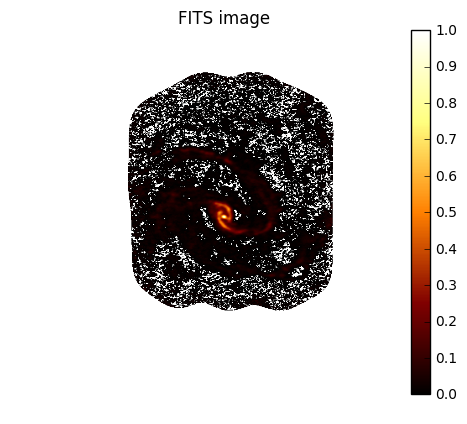

In [21]:
plt.figure(figsize=(5,5))
im = plt.imshow(data, cmap=plt.cm.afmhot)
plt.title('FITS image')
plt.axis('off')
divider = make_axes_locatable(plt.gca())
cax = divider.append_axes("right", size="5%", pad=0.05)
plt.colorbar(im, cax=cax)
plt.show()

/home/mavillan/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:5: RuntimeWarning: invalid value encountered in greater


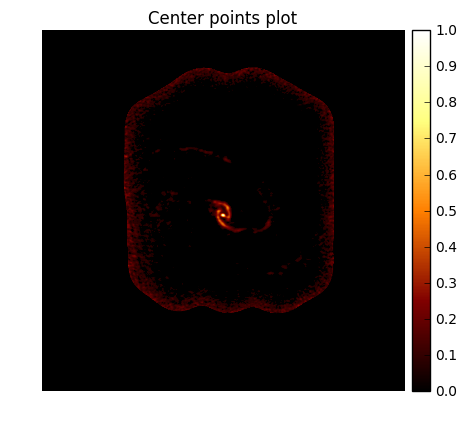

In [16]:
def level_set_plot(data, level):
    plt.figure(figsize=(5,5))
    ax = plt.gca()
    _data = np.zeros(data.shape)
    mask = data > level
    _data[mask] = data[mask]
    im = ax.imshow(_data, cmap=plt.cm.afmhot)
    plt.title('Center points plot')
    plt.axis('off')
    divider = make_axes_locatable(ax)
    cax = divider.append_axes("right", size="5%", pad=0.08)
    plt.colorbar(im, cax=cax)
    plt.show()
    
base_level = estimate_rms(data)
interact(level_set_plot, data=fixed(data), level=(base_level, 1.))

In [36]:
np.logical_or( data < base_level, data.mask )

/home/mavillan/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:1: RuntimeWarning: invalid value encountered in less
  if __name__ == '__main__':


masked_array(data =
 [[-- -- -- ..., -- -- --]
 [-- -- -- ..., -- -- --]
 [-- -- -- ..., -- -- --]
 ..., 
 [-- -- -- ..., -- -- --]
 [-- -- -- ..., -- -- --]
 [-- -- -- ..., -- -- --]],
             mask =
 [[ True  True  True ...,  True  True  True]
 [ True  True  True ...,  True  True  True]
 [ True  True  True ...,  True  True  True]
 ..., 
 [ True  True  True ...,  True  True  True]
 [ True  True  True ...,  True  True  True]
 [ True  True  True ...,  True  True  True]],
       fill_value = True)

In [37]:
np.logical_or(data < base_level, data.mask) 

/home/mavillan/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:1: RuntimeWarning: invalid value encountered in less
  if __name__ == '__main__':


masked_array(data =
 [[-- -- -- ..., -- -- --]
 [-- -- -- ..., -- -- --]
 [-- -- -- ..., -- -- --]
 ..., 
 [-- -- -- ..., -- -- --]
 [-- -- -- ..., -- -- --]
 [-- -- -- ..., -- -- --]],
             mask =
 [[ True  True  True ...,  True  True  True]
 [ True  True  True ...,  True  True  True]
 [ True  True  True ...,  True  True  True]
 ..., 
 [ True  True  True ...,  True  True  True]
 [ True  True  True ...,  True  True  True]
 [ True  True  True ...,  True  True  True]],
       fill_value = True)

In [38]:
##########################################
# Approach 1
##########################################

# number of points of each type
Nb = 0
Nc = 100
Ne = 4*Nc-4*Nb

center_points = random_centers_generation(data, Nc, base_level=base_level, power=7.)
collocation_points = qrandom_centers_generation(dfunc, Ne, base_level, ndim=2)
boundary_points = boundary_generation(Nb)


# right format
xc = center_points[:,0]
yc = center_points[:,1]
xe = collocation_points[:,0]
ye = collocation_points[:,1]
xb = boundary_points[:,0]
yb = boundary_points[:,1]


# visualizing the choosen points
points_plot(data, center_points=center_points, title="Center Points")
points_plot(data, center_points=collocation_points, title="Collocation Points")


####################################
# Initial parameters estimation
####################################
minsig = ( 0.5*(1./data.shape[0] + 1./data.shape[1]) ) / 6.
maxsig = 30*minsig
c0, sig0 = estimate_initial_guess(center_points, dfunc, minsig=minsig, maxsig=maxsig, method='min_dist')


solution_plot(dfunc, c0, sig0, xc, yc, dims=data.shape, base_level=base_level)
params_plot(c0, sig0, xc, yc)
params_distribution_plot(c0, sig0)


elm01 = ELModel(data, dfunc, data.shape, xe, ye, xc, yc, xb, yb, c0, sig0, a=1., lamb1=1., d1psi1=d1psi, 
                d1psi2=d1psi, d2psi2=d2psi, base_level=base_level, pix_freedom=1.)

elm02 = copy.deepcopy(elm01)

../lib/points_generation.py:50: RuntimeWarning: invalid value encountered in less_equal
  mask = data <= base_level


ValueError: probabilities do not sum to 1

# `SDP81_band7_11exec.contR1.image`

In [42]:
fits_path = "../data/images/SDP81_band7_11exec.contR1.image.fits"
x, y, data, dfunc = load_data(fits_path)

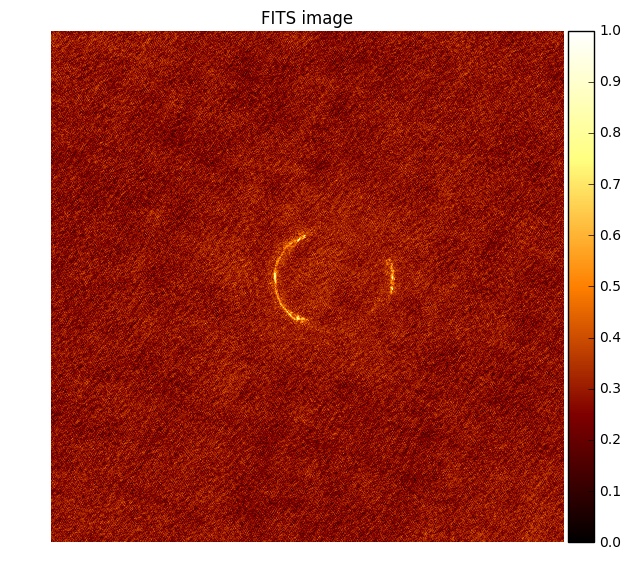

In [43]:
plt.figure(figsize=(7,7))
im = plt.imshow(data, cmap=plt.cm.afmhot)
plt.title('FITS image')
plt.axis('off')
divider = make_axes_locatable(plt.gca())
cax = divider.append_axes("right", size="5%", pad=0.05)
plt.colorbar(im, cax=cax)
plt.show()

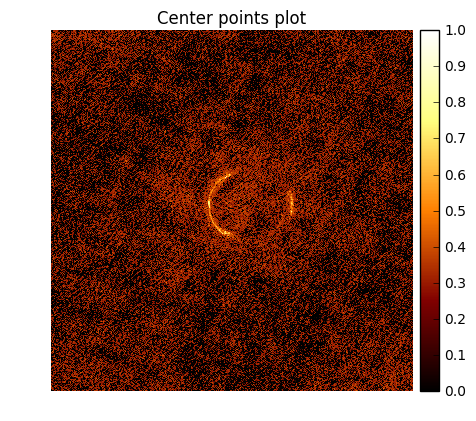

In [44]:
def level_set_plot(data, level):
    plt.figure(figsize=(5,5))
    ax = plt.gca()
    _data = np.zeros(data.shape)
    mask = data > level
    _data[mask] = data[mask]
    im = ax.imshow(_data, cmap=plt.cm.afmhot)
    plt.title('Center points plot')
    plt.axis('off')
    divider = make_axes_locatable(ax)
    cax = divider.append_axes("right", size="5%", pad=0.08)
    plt.colorbar(im, cax=cax)
    plt.show()
    
base_level = estimate_rms(data)
interact(level_set_plot, data=fixed(data), level=(base_level, 1.))

# `VYCMa_658_contap4.clean.fits`

In [45]:
fits_path = "../data/images/VYCMa_658_contap4.clean.fits"
x, y, data, dfunc = load_data(fits_path)

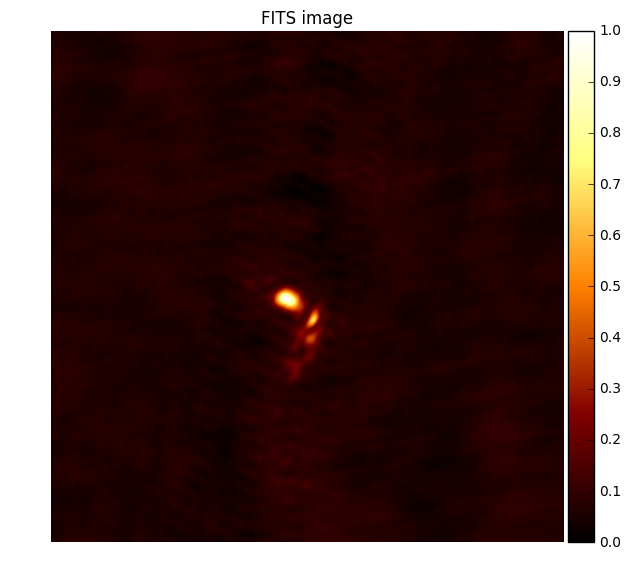

In [46]:
plt.figure(figsize=(7,7))
im = plt.imshow(data, cmap=plt.cm.afmhot)
plt.title('FITS image')
plt.axis('off')
divider = make_axes_locatable(plt.gca())
cax = divider.append_axes("right", size="5%", pad=0.05)
plt.colorbar(im, cax=cax)
plt.show()

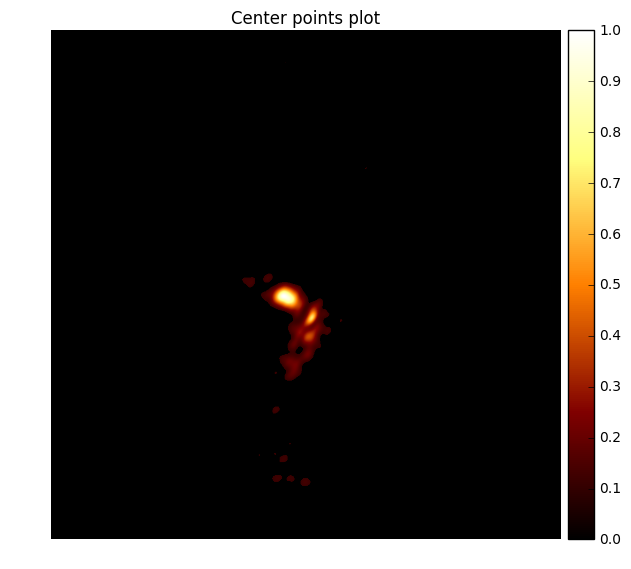

In [55]:
def level_set_plot(data, level):
    plt.figure(figsize=(7,7))
    ax = plt.gca()
    _data = np.zeros(data.shape)
    mask = data > level
    _data[mask] = data[mask]
    im = ax.imshow(_data, cmap=plt.cm.afmhot)
    plt.title('Center points plot')
    plt.axis('off')
    divider = make_axes_locatable(ax)
    cax = divider.append_axes("right", size="5%", pad=0.08)
    plt.colorbar(im, cax=cax)
    plt.show()
    
base_level = 1.5*estimate_rms(data)
interact(level_set_plot, data=fixed(data), level=(base_level, 1.))

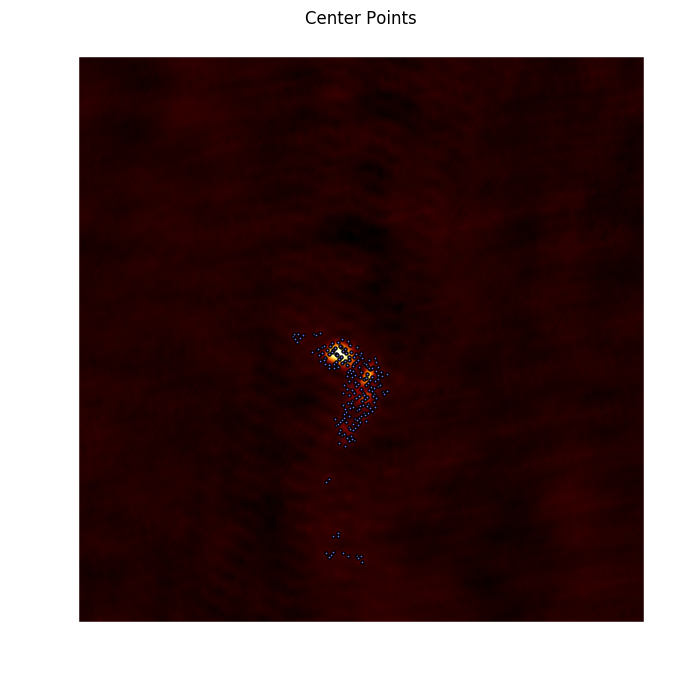

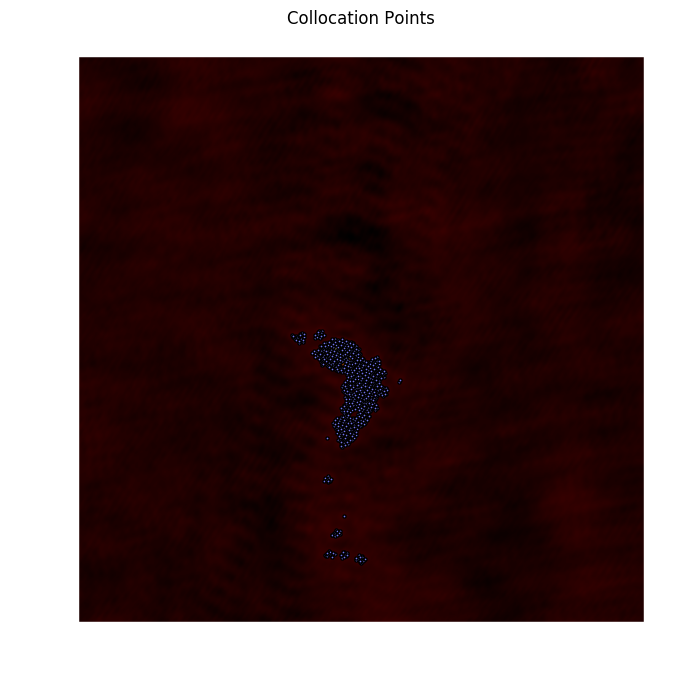

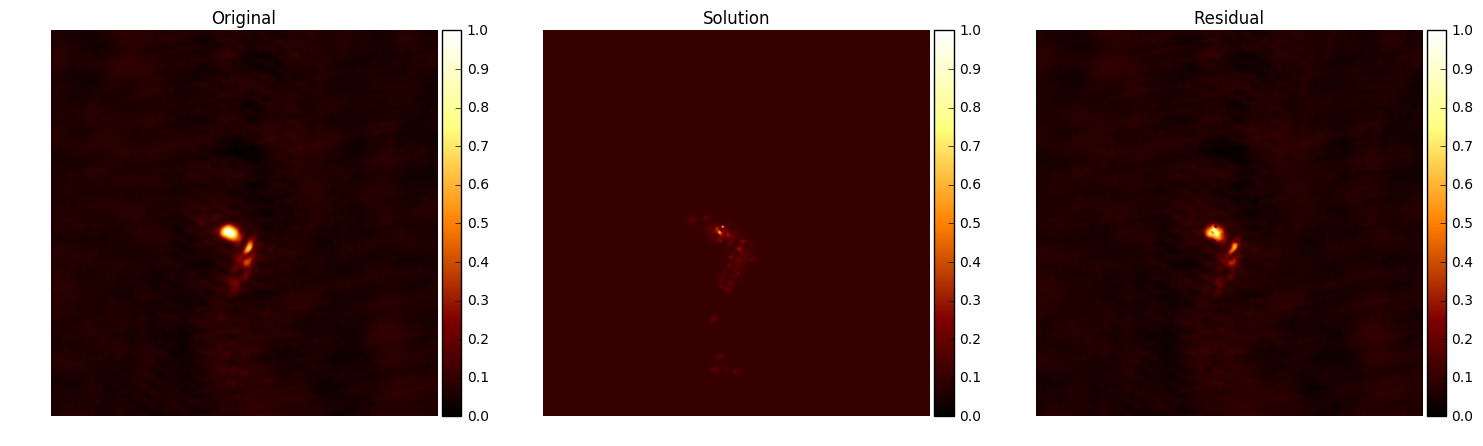

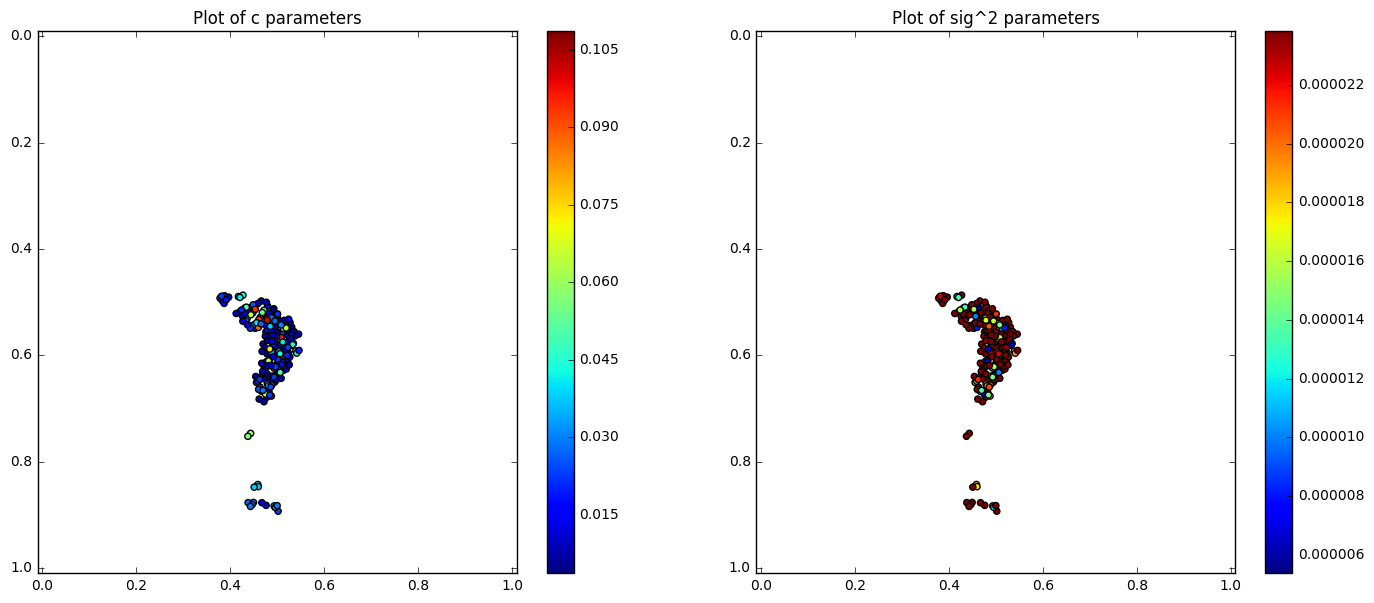

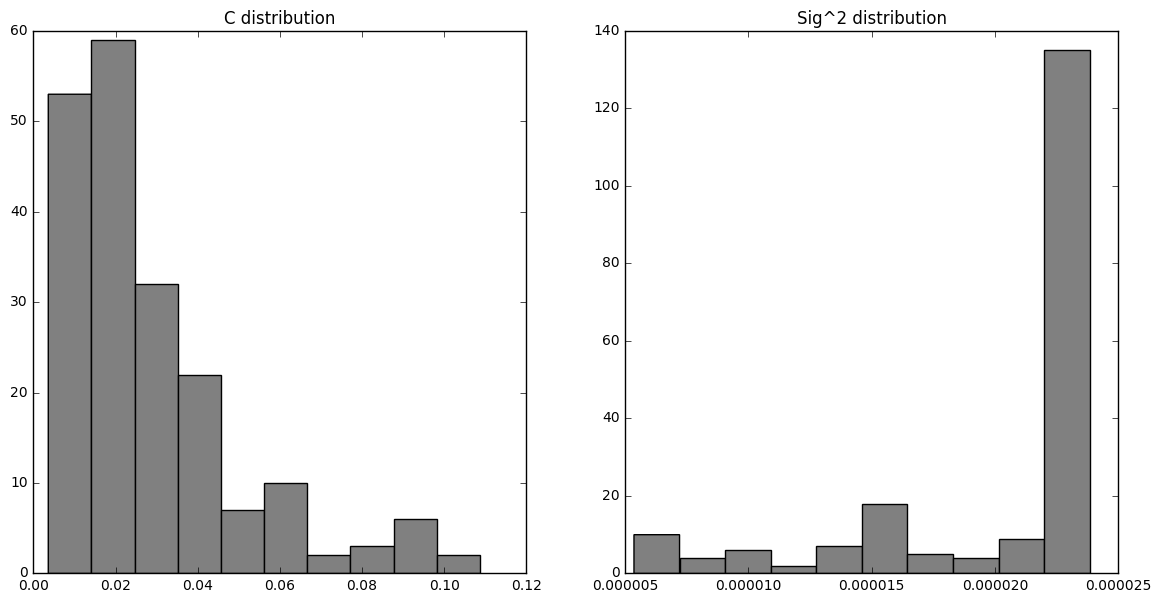

In [60]:
##########################################
# Approach 1
##########################################

# number of points of each type
Nb = 0
Nc = 200
Ne = 4*Nc-4*Nb

#center_points = random_centers_generation(data, Nc, base_level=base_level, power=7.)
points = qrandom_centers_generation(dfunc, Nc+Ne, base_level, ndim=2)
center_points = points[0:Nc]
collocation_points = points[Nc:Nc+Ne]
boundary_points = boundary_generation(Nb)

# right format
xc = center_points[:,0]
yc = center_points[:,1]
xe = collocation_points[:,0]
ye = collocation_points[:,1]
xb = boundary_points[:,0]
yb = boundary_points[:,1]


# visualizing the choosen points
points_plot(data, center_points=center_points, title="Center Points")
points_plot(data, center_points=collocation_points, title="Collocation Points")


####################################
# Initial parameters estimation
####################################
minsig = ( 0.5*(1./data.shape[0] + 1./data.shape[1]) ) / 6.
maxsig = 30*minsig
c0, sig0 = estimate_initial_guess(center_points, dfunc, minsig=minsig, maxsig=maxsig, method='min_dist')


solution_plot(dfunc, c0, sig0, xc, yc, dims=data.shape, base_level=base_level)
params_plot(c0, sig0, xc, yc)
params_distribution_plot(c0, sig0)


elm01 = ELModel(data, dfunc, data.shape, xe, ye, xc, yc, xb, yb, c0, sig0, a=1., lamb1=1., d1psi1=d1psi, 
                d1psi2=d1psi, d2psi2=d2psi, base_level=base_level, pix_freedom=1.)

elm02 = copy.deepcopy(elm01)


 
##########################################################################################
FINAL RESULTS:
##########################################################################################

Solver Output:

success: False

status: 5

message: Number of calls to function has reached maxfev = 100000.

nfev: 100133
Residual RMS: 0.113267272226
Residual Variance: 0.000467829333295
Residual Entropy: 5.6981495862
Total elapsed time: 129.681695938 [s]

Coverage of solution:
Hausdorff distance between collocation and center points: 0.0314696271408
Mean min distance between collocation and center points: 0.00397010192153


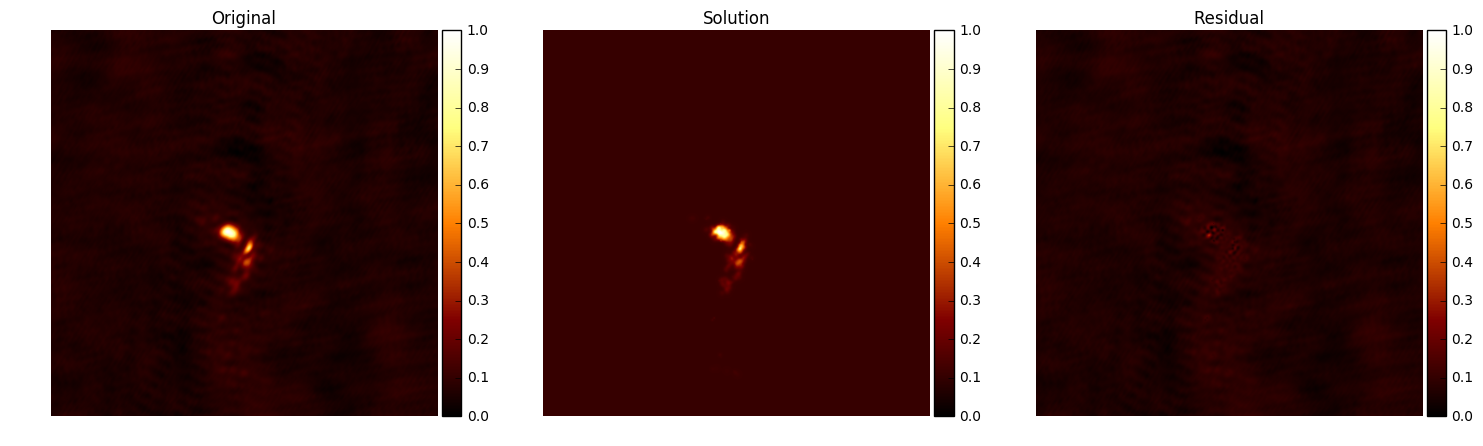

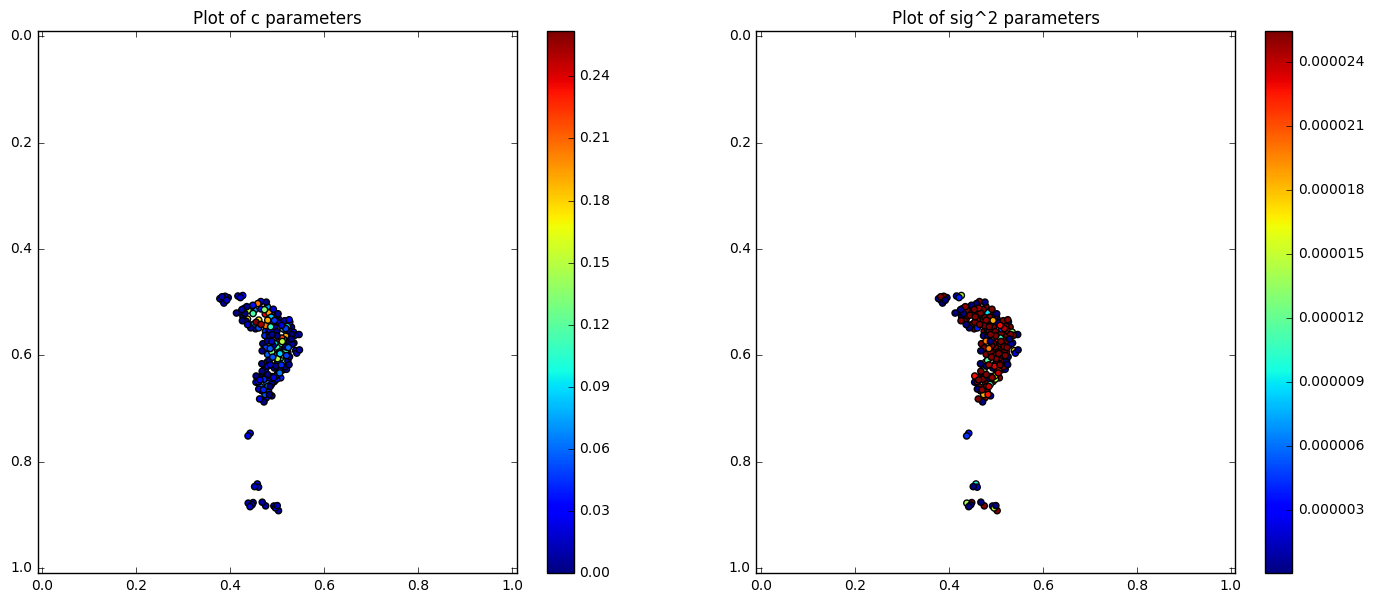

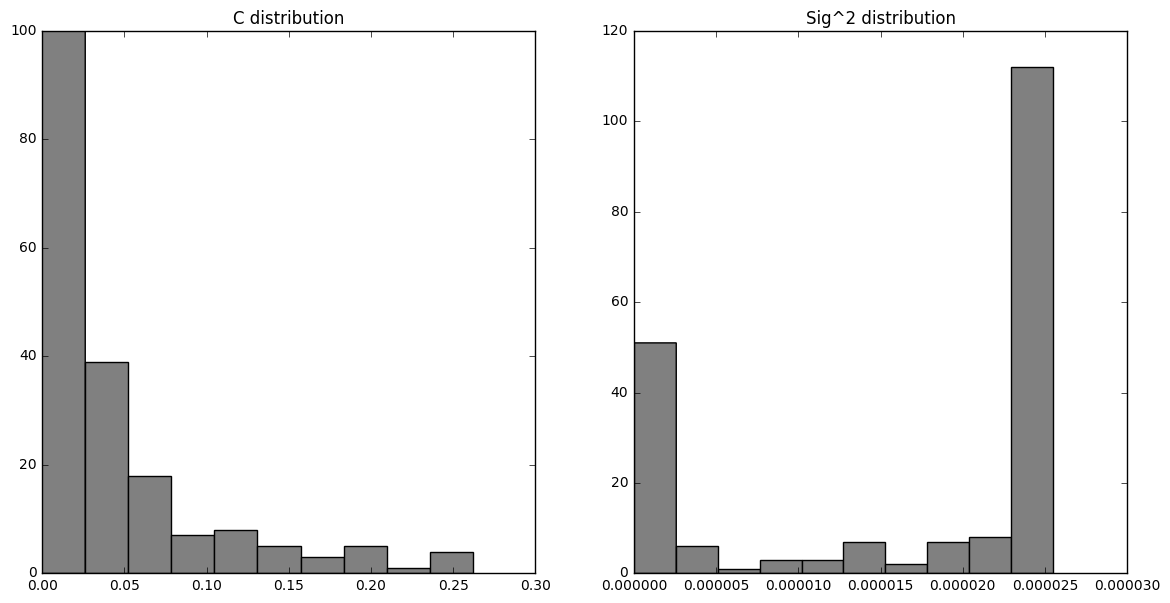

In [61]:
elm_solver(elm01, method='standard', max_nfev=100000)

In [63]:
# gaussian agglomeration
xc, yc, c, sig = elm01.get_params_mapped()
mu = np.vstack([xc, yc]).T

components_dict01 = gaussian_reduction(c, mu, sig, n_comp=1)

Merged components 74 and 147 with 1.1945999745e-13 dissimilarity
Merged components 0 and 50 with 3.78003184309e-13 dissimilarity
Merged components 126 and 175 with 1.19844168572e-11 dissimilarity
Merged components 82 and 129 with 2.39503555644e-11 dissimilarity
Merged components 45 and 194 with 2.704209253e-11 dissimilarity
Merged components 78 and 146 with 4.24382806656e-11 dissimilarity
Merged components 134 and 157 with 3.06335989499e-10 dissimilarity
Merged components 97 and 116 with 3.14559509226e-10 dissimilarity
Merged components 30 and 187 with 1.4029385872e-09 dissimilarity
Merged components 172 and 186 with 2.44463481708e-09 dissimilarity
Merged components 92 and 178 with 4.09729766782e-09 dissimilarity
Merged components 42 and 129 with 1.22696943924e-08 dissimilarity
Merged components 16 and 137 with 2.55269123567e-06 dissimilarity
Merged components 76 and 169 with 2.81120734703e-06 dissimilarity
Merged components 40 and 72 with 3.62900710219e-06 dissimilarity
Merged compone

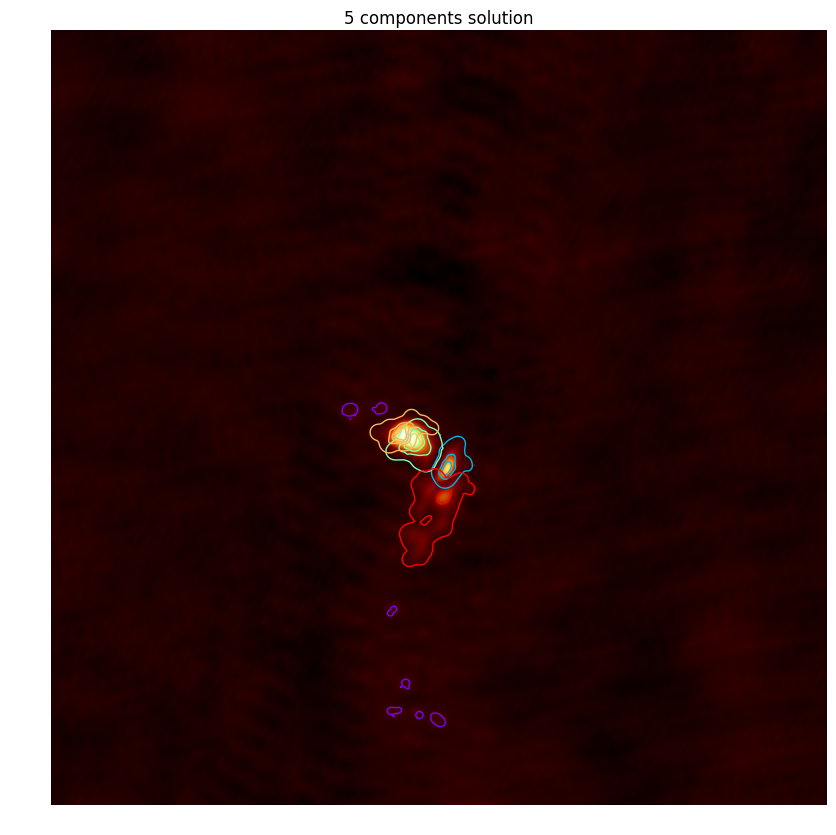

In [64]:
interact(components_plot, elm=fixed(elm01), data=fixed(data), components_dict=fixed(components_dict01), n_comp=(1,20), dims=fixed(data.shape), resolution=fixed(1), n_levels=fixed(5))

***
***

# `calibrated_final_cont_image.image`

In [69]:
fits_path = "../data/images/calibrated_final_cont_image.image.fits"
x, y, data, dfunc = load_data(fits_path)

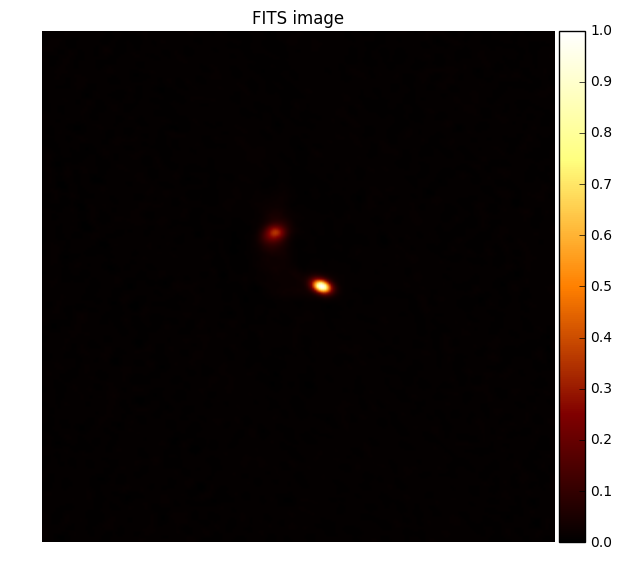

In [70]:
plt.figure(figsize=(7,7))
im = plt.imshow(data, cmap=plt.cm.afmhot)
plt.title('FITS image')
plt.axis('off')
divider = make_axes_locatable(plt.gca())
cax = divider.append_axes("right", size="5%", pad=0.05)
plt.colorbar(im, cax=cax)
plt.show()

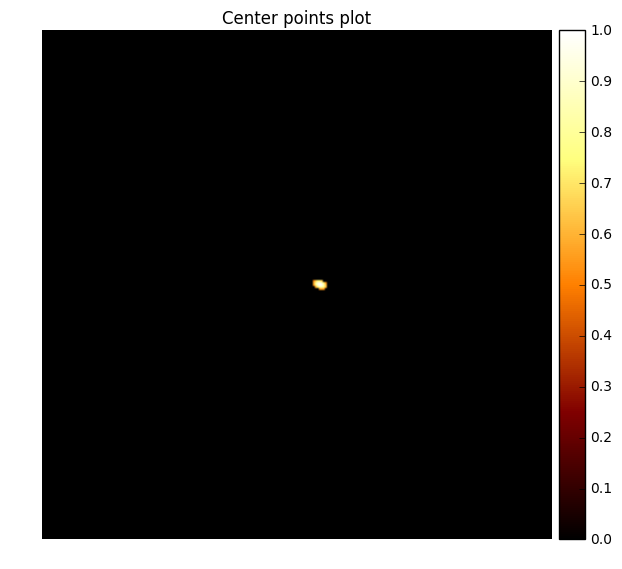

<function __main__.level_set_plot>

In [71]:
def level_set_plot(data, level):
    plt.figure(figsize=(7,7))
    ax = plt.gca()
    _data = np.zeros(data.shape)
    mask = data > level
    _data[mask] = data[mask]
    im = ax.imshow(_data, cmap=plt.cm.afmhot)
    plt.title('Center points plot')
    plt.axis('off')
    divider = make_axes_locatable(ax)
    cax = divider.append_axes("right", size="5%", pad=0.08)
    plt.colorbar(im, cax=cax)
    plt.show()
    
base_level = 1.5*estimate_rms(data)
interact(level_set_plot, data=fixed(data), level=(base_level, 1.))

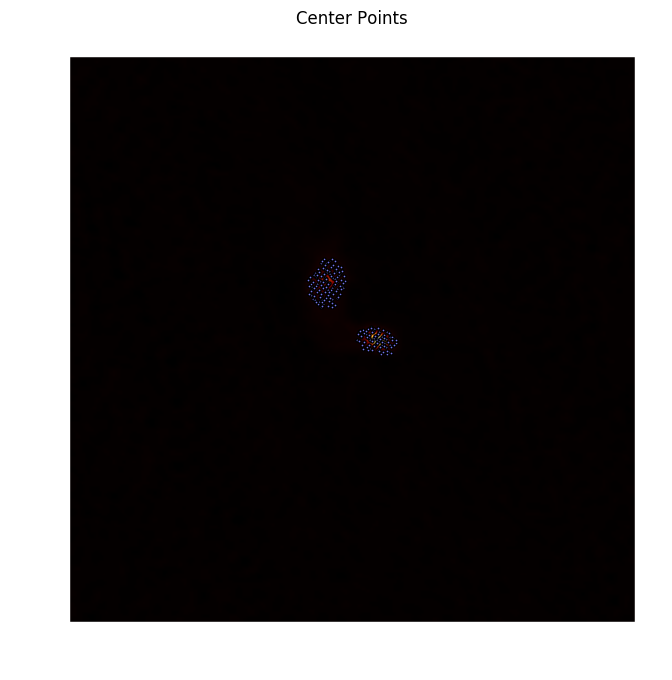

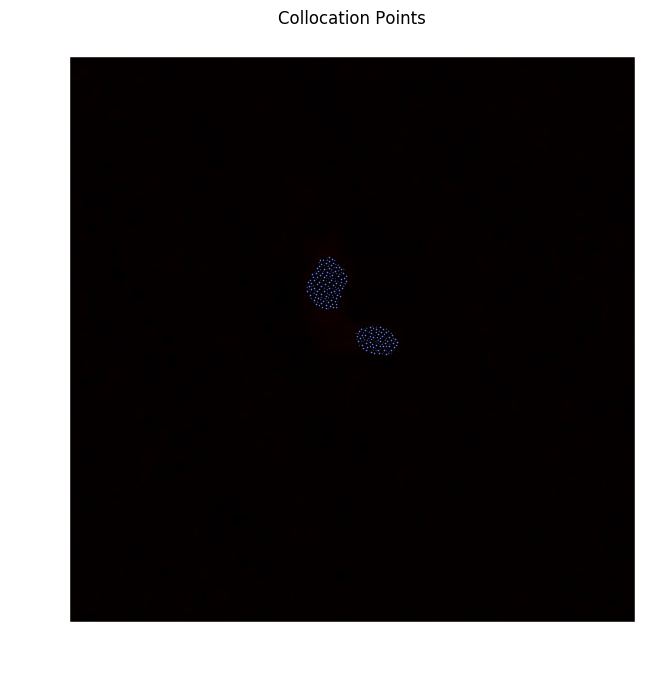

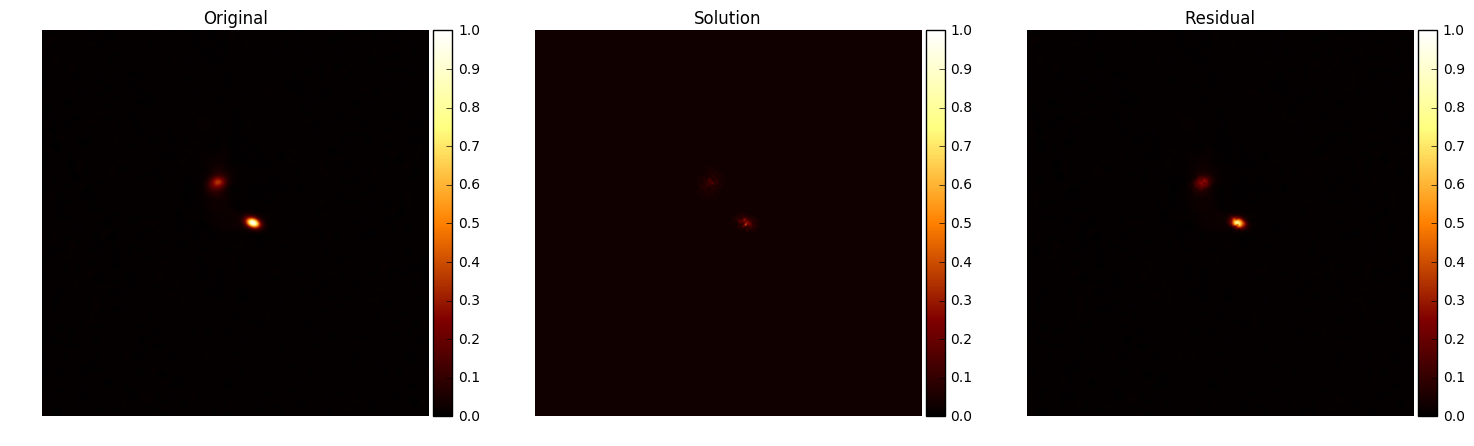

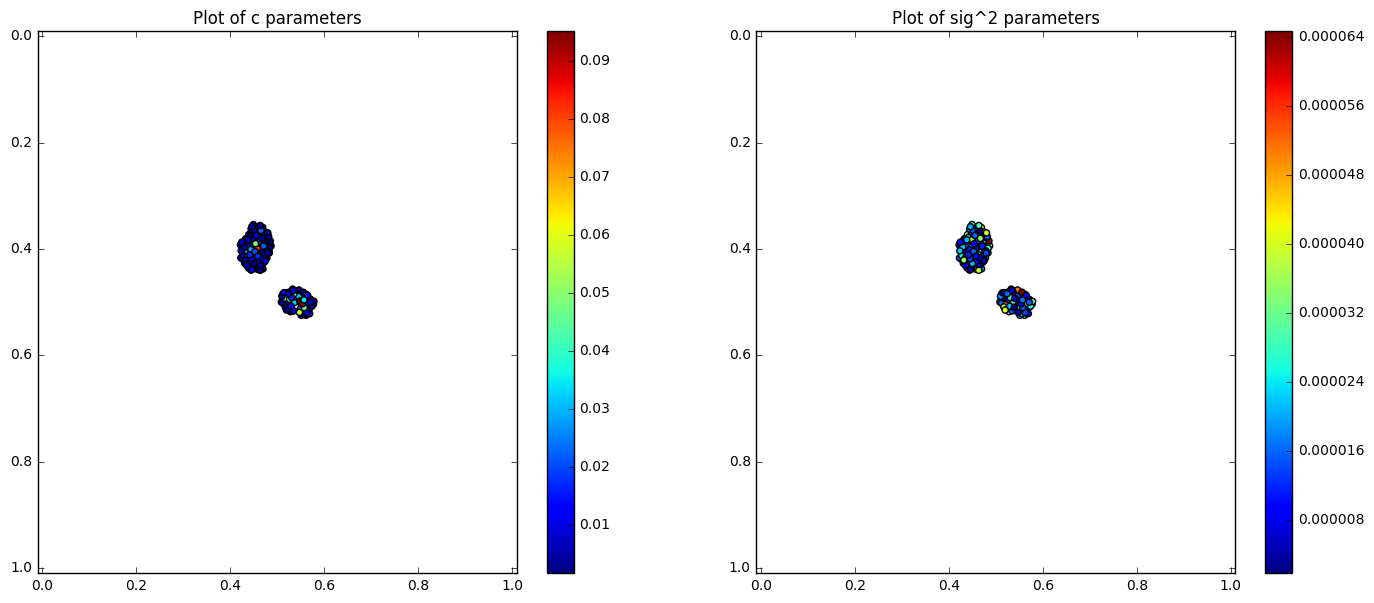

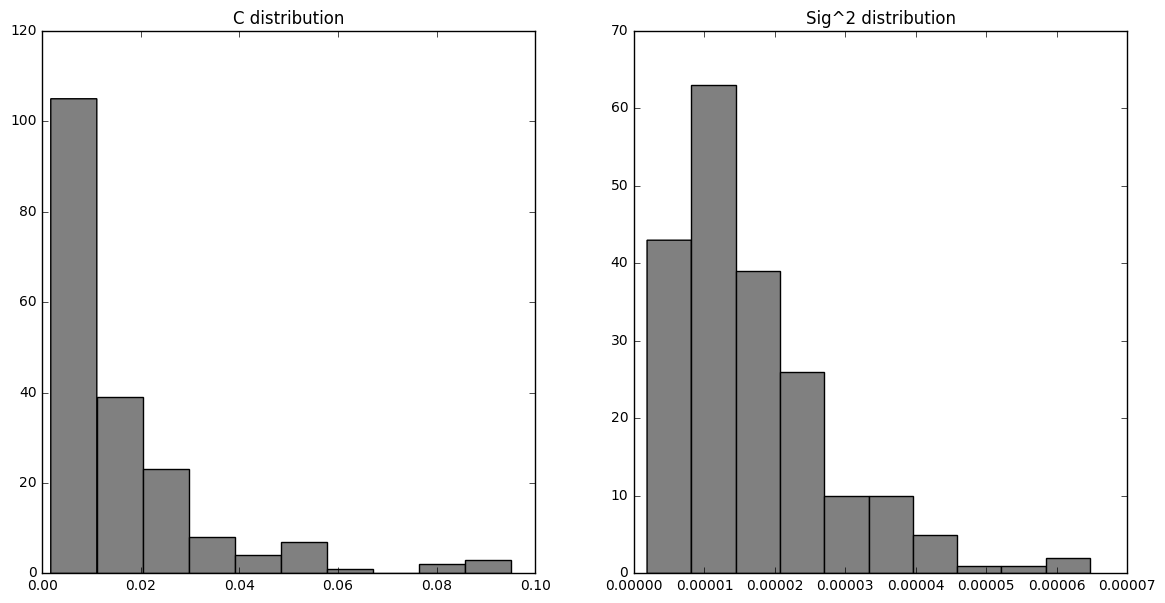

In [ ]:
##########################################
# Approach 1
##########################################

# number of points of each type
Nb = 0
Nc = 200
Ne = 4*Nc-4*Nb

#center_points = random_centers_generation(data, Nc, base_level=base_level, power=7.)
points = qrandom_centers_generation(dfunc, Nc+Ne, base_level, ndim=2)
center_points = points[0:Nc]
collocation_points = points[Nc:Nc+Ne]
boundary_points = boundary_generation(Nb)

# right format
xc = center_points[:,0]
yc = center_points[:,1]
xe = collocation_points[:,0]
ye = collocation_points[:,1]
xb = boundary_points[:,0]
yb = boundary_points[:,1]


# visualizing the choosen points
points_plot(data, center_points=center_points, title="Center Points")
points_plot(data, center_points=collocation_points, title="Collocation Points")


####################################
# Initial parameters estimation
####################################
minsig = ( 0.5*(1./data.shape[0] + 1./data.shape[1]) ) / 6.
maxsig = 30*minsig
c0, sig0 = estimate_initial_guess(center_points, dfunc, minsig=minsig, maxsig=maxsig, method='min_dist')


solution_plot(dfunc, c0, sig0, xc, yc, dims=data.shape, base_level=base_level)
params_plot(c0, sig0, xc, yc)
params_distribution_plot(c0, sig0)


elm01 = ELModel(data, dfunc, data.shape, xe, ye, xc, yc, xb, yb, c0, sig0, a=1., lamb1=1., d1psi1=d1psi, 
                d1psi2=d1psi, d2psi2=d2psi, base_level=base_level, pix_freedom=1.)

elm02 = copy.deepcopy(elm01)

In [ ]:
elm_solver(elm01, method='standard', max_nfev=100000)